In [51]:
import pandas as pd
low_memoru=False
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [28]:
filename = r'/home/peter/Documents/Faculdade/6-Sem-Noite/Lab_de_BD_MASSANORI/analise-de-covid-brasil/analise-de-covid-brasil.xlsx'
df = pd.read_excel(filename)

In [45]:
df.sample(10)

,Cidade,código ibge da cidade,data,semana epidemiológica,população estimada 2019,é o último,é repetido,último disponível confirmado,último disponível confirmado por 100 mil habitantes,última data disponível,última taxa de mortalidade disponível,últimas mortes disponíveis,ordem de lugar,tipo de lugar,Estado,Novas confirmações,Novas mortes
233195,Campinas,3509502.0,2020-06-19,25,1204073.0,False,False,5127,425.80475,2020-06-19,0.0396,203,94,city,SP,797,9
24467,Jaçanã,2405009.0,2020-04-21,17,9133.0,False,False,1,10.94930,2020-04-21,0.0000,0,5,city,RN,0,0
7981,Rolândia,4122404.0,2020-04-07,15,66580.0,False,False,1,1.50195,2020-04-07,0.0000,0,4,city,PR,0,0
194018,Ivoti,4310801.0,2020-06-11,24,24293.0,False,False,15,61.74618,2020-06-11,0.0667,1,84,city,RS,2,0
219175,Mâncio Lima,1200336.0,2020-06-17,25,18977.0,False,False,99,521.68414,2020-06-17,0.0101,1,50,city,AC,4,0
37406,Três Barras,4218301.0,2020-04-28,18,19275.0,False,False,1,5.18807,2020-04-28,0.0000,0,1,city,SC,1,0
306729,Castelândia,5205059.0,2020-07-04,27,3435.0,False,False,4,116.44833,2020-07-04,0.0000,0,33,city,GO,0,0
317428,Ouro Verde de Goiás,5215405.0,2020-07-06,28,3759.0,False,False,2,53.20564,2020-07-06,0.0000,0,22,city,GO,0,0
273185,Água Santa,4300059.0,2020-06-27,26,3748.0,False,False,25,667.02241,2020-06-27,0.0000,0,51,city,RS,7,0
247573,Paraí,4314001.0,2020-06-22,26,7657.0,False,False,18,235.07901,2020-06-22,0.0000,0,91,city,RS,0,0


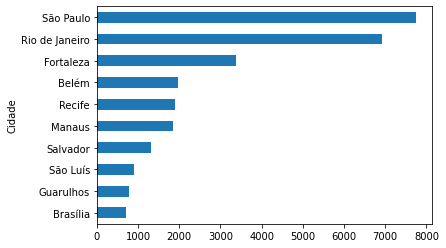

In [50]:
df.groupby('Cidade')['últimas mortes disponíveis'].max().sort_values().tail(10).plot(kind='barh')

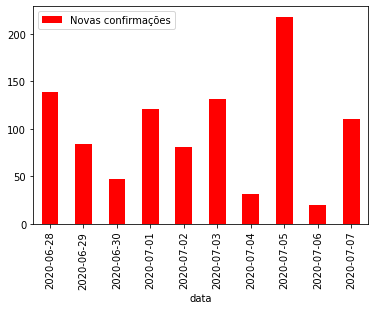

In [40]:
region = df.query('Cidade == "São José dos Campos"')
region.tail(10).plot(kind='bar', 
        x='data', y='Novas confirmações', color='RED')

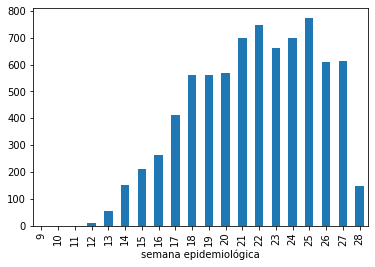

In [38]:
region.groupby('semana epidemiológica')['Novas mortes'].sum().plot(kind='bar')

In [77]:
def ballPlot(x_data, y_data, x_label="", y_label="", title="", color = "g", yscale_log=False):

    # Cria o objeto Plot
    _, ax = plt.subplots()

    # Coloca a data, seta o tamanho (s), Cor e transparencia (alpha)
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 1)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

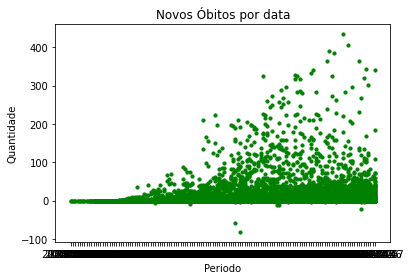

In [78]:
ballPlot(df['data'],df['Novas mortes'], title='Novos Óbitos por data', y_label='Quantidade',x_label='Periodo')